<a href="https://colab.research.google.com/github/chakri0207/bharat-intern-dss/blob/main/bharatinterndsttc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

trn_df = pd.read_csv('/content/titanic/tit_test.csv')
trn_df.head()

In [ ]:

from google.colab import files
from IPython.display import Image
uploded = files.upload()

Saving tit_train.csv to tit_train.csv
Saving tit_test.csv to tit_test.csv


In [ ]:
trn_df = pd.read_csv('tit_train.csv')
trn_df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [ ]:
missing_values = trn_df.isnull().sum()
missing_values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

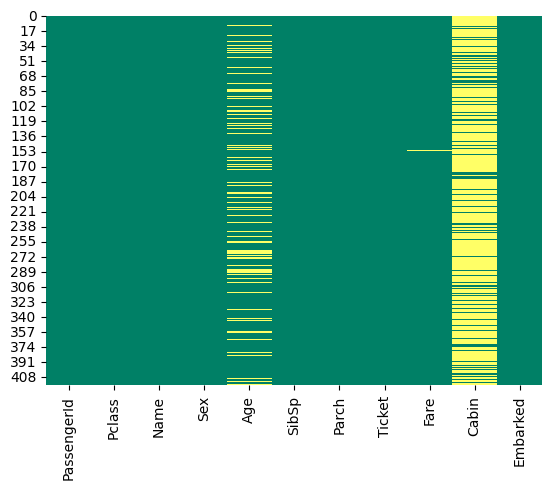

In [ ]:
sns.heatmap(trn_df.isnull(), cmap='summer', cbar=False)
plt.show()

In [ ]:
numerical_columns = trn_df.select_dtypes(include=['int64', 'float64']).columns
trn_df[numerical_columns] = trn_df[numerical_columns].fillna(trn_df[numerical_columns].mean())

categorical_columns = trn_df.select_dtypes(include='object').columns
trn_df[categorical_columns] = trn_df[categorical_columns].fillna('Unknown')

In [ ]:
print(trn_df.isnull().sum())


PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [ ]:

trn_df.columns

trn_df.size

trn_df.shape

(418, 11)

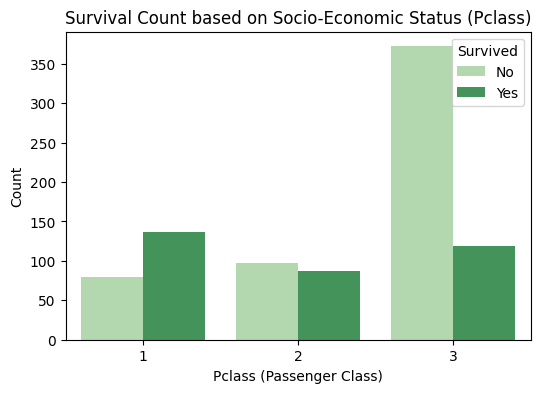

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Pclass', hue='Survived', data=trn_df, palette='Greens')
plt.title('Survival Count based on Socio-Economic Status (Pclass)')
plt.xlabel('Pclass (Passenger Class)')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()

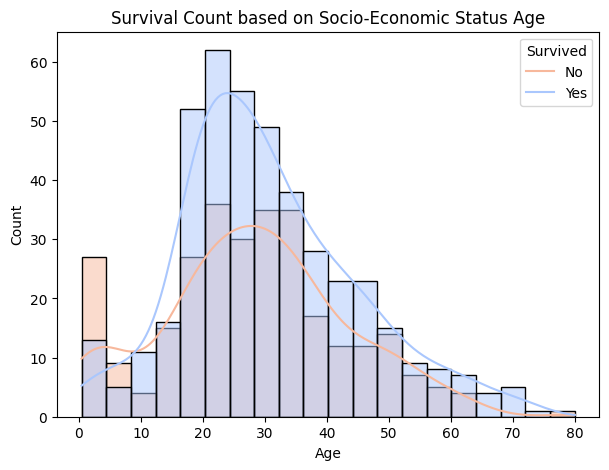

In [ ]:
plt.figure(figsize=(7, 5))
sns.histplot(x='Age', hue='Survived', data=trn_df, kde=True, palette='coolwarm')
plt.title('Survival Count based on Socio-Economic Status Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()



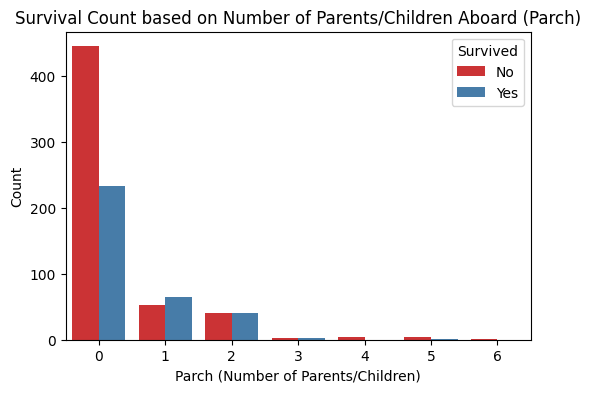

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Parch', hue='Survived', data=trn_df, palette='Set1')
plt.title('Survival Count based on Number of Parents/Children Aboard (Parch)')
plt.xlabel('Parch (Number of Parents/Children)')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()

In [ ]:

columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Fare', 'Embarked']

trn_df1 = trn_df.drop(columns=columns_to_drop)

In [ ]:

trn_df1

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0
...,...,...,...,...,...,...
886,0,2,male,27.0,0,0
887,1,1,female,19.0,0,0
888,0,3,female,NaN,1,2
889,1,1,male,26.0,0,0
